<a href="https://colab.research.google.com/github/pratik-chakraborty10/Reinforcement-Learning_ML/blob/main/Thomson_Sampling_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thomson Sampling

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing dataset

In [2]:
dataset=pd.read_csv("ThomsonSamplingFacebook_Ads.csv")

## Implementation

In [10]:
import random
N = 15000 #number of rounds
num_ads = 10 #number of ads
ads_selected = []
num_of_rewards_1 = [0] * num_ads #Ni1(n)
num_of_rewards_0 = [0] * num_ads #Ni0(n)
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0 #choosing highest random value
  for i in range(0, num_ads):
    random_beta = random.betavariate(num_of_rewards_1[i] + 1, num_of_rewards_0[i] + 1) #formula for TSA distribution
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad] #fetching specific ad from each round
  if reward == 1:
    num_of_rewards_1[ad] = num_of_rewards_1[ad] + 1 #if reward=1
  else:
    num_of_rewards_0[ad] = num_of_rewards_0[ad] + 1 #if reward=0

  total_reward = total_reward + reward



## Histogram Visualization

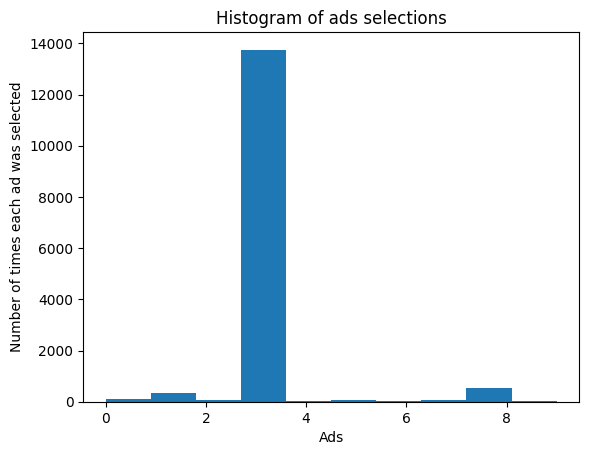

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()